# Библиотека Pandas

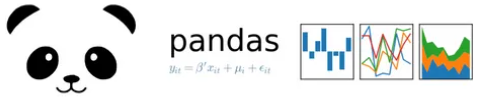

Pandas - однин из самых важных и популярных инструментов Python для data scientist-ов, аналитиков и работы с данными в целом. Pandas - библиотека с открытым исходным кодом, она позволяет обрабатывать, очищать и манипулировать данными. Pandas имеет расширенный и гибкий набор структур данных разных типов. Преимущества pandas в простоте установки и использования, удобстве работы с данными и их отображении.

Основные структуры данных в Pandas: Series и DataFrame

DataFrame это таблицей со строками и колонками. Каждое значение внутри  DataFrame имеет 2 индекса: ряд и колонка.

Series  - одна колонка, которая может хранить данные любого типа.

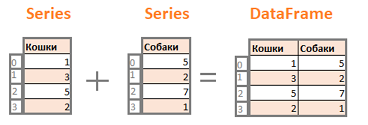

Также в pandas  существуют стандартные типы данных (Python type), так и новые: datetime, timedelta, category

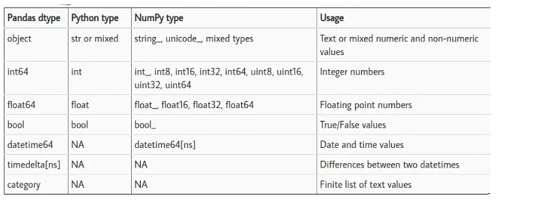

In [1]:
# устоявщаяся аббревиатура "pd", которую можно встретить на многих форумах
import pandas as pd

# Чтение и запись данных из файла

Например, чтобы прочитать данные из csv, в стандартном Python надо сначала решить, как хранить данные, затем открыть файл, прочитать его построчно, отделить значения друг от друга и очистить данные от специальных символов.

В Pandas всё проще. Во-первых, не нужно думать, как будут храниться данные — они лежат в датафрейме. Во-вторых, достаточно написать одну команду.


In [22]:
# Cтандартный Python

with open('salary.csv', encoding='utf-8') as f:
    content = f.readlines()
# выведем то, что прочитали. Видим, что есть символы \n, которые нужно удалить
print(content[0:10])

# замена символа \n на пустоту
content = [x.replace('\n','') for x in content]
print(content[0:10])

['reg,salary\n', 'Чукотский авт. округ,137976\n', 'г. Москва,135375\n', 'Магаданская обл.,127137\n', 'Ямало-Ненецкий\xa0 авт. округ,116810\n', 'Сахалинская обл.,108761\n', 'Ненецкий авт. округ,105423\n', 'Республика Саха (Якутия),103329\n', 'Ханты-Мансийский АО,101983\n', 'Камчатский край,101047\n']
['reg,salary', 'Чукотский авт. округ,137976', 'г. Москва,135375', 'Магаданская обл.,127137', 'Ямало-Ненецкий\xa0 авт. округ,116810', 'Сахалинская обл.,108761', 'Ненецкий авт. округ,105423', 'Республика Саха (Якутия),103329', 'Ханты-Мансийский АО,101983', 'Камчатский край,101047']


In [37]:
# в Pandas
data = pd.read_csv('salary.csv', # путь к файлу
                   sep=',', # разделитель: стандартно запятая, однако может быть и другой
                   header=[0], # указываем какой номер строки является названием столбцов 
                   dtype={'reg':str,'salary':int}) # указываем типы данных для каждого столбца)
data

,reg,salary
0,Чукотский авт. округ,137976
1,г. Москва,135375
2,Магаданская обл.,127137
3,Ямало-Ненецкий авт. округ,116810
4,Сахалинская обл.,108761
...,...,...
80,Карачаево-Черкесская Республика,35726
81,Ивановская обл.,35321
82,Брянская обл.,35188
83,Чеченская Республика,34336


In [ ]:
# также можно в обратную сторону сохранить в файл csv

data.to_csv('salary.csv', # название файла
            sep=',', # разделитель
            header =False, # БЕЗ названия колонок
            index=False # БЕЗ номеров строк
           )

In [38]:
# кроме csv pandas работает с txt, excel, sql, буфер обмена, html и другими.

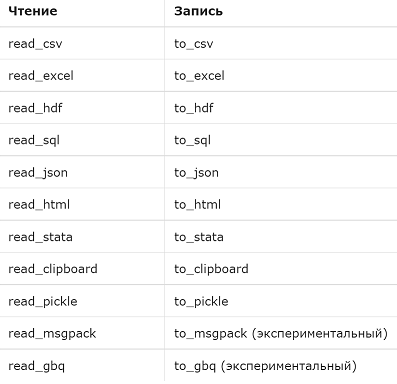

# Создание Series и DataFrame

In [55]:
series = pd.Series([1,3,'adasd',6,'f22'])
series

0        1
1        3
2    adasd
3        6
4      f22
dtype: object

In [45]:
df = pd.DataFrame(columns=['col_Number_1', 'col_Number_2'])
df

,col_Number_1,col_Number_2


In [46]:
df = pd.DataFrame(index=['row_1', 'row_2', 'row_3'])
df

""
row_1
row_2
row_3


In [44]:
df = pd.DataFrame(columns=['col_Number_1', 'col_Number_2'], index=['row_1', 'row_2', 'row_3'])
df

,col_Number_1,col_Number_2
row_1,NaN,NaN
row_2,NaN,NaN
row_3,NaN,NaN


In [53]:
sales=[1201,2123,321]
months=['nov', 'feb', 'march']
df = pd.DataFrame(data=sales, columns=['sales'], index=months)
df

,sales
nov,1201
feb,2123
march,321


In [65]:
goods_sold = [
{'computers': 10, 'cars': 1, 'soft': 3},
{'computers': 4, 'soft': 5, 'bicycles': 1},
{'computers': 6, 'cars': 2, 'soft': 3}
]
df = pd.DataFrame(goods_sold)
df

,computers,cars,soft,bicycles
0,10,1.0,3,NaN
1,4,NaN,5,1.0
2,6,2.0,3,NaN


# Методы

In [60]:
# .shape показывает, сколько в датафрейме строк и колонок
df.shape

(3, 4)

In [61]:
# .columns узнаем названия колонок
df.columns

Index(['computers', 'cars', 'soft', 'bicycles'], dtype='object')

In [62]:
# .dtypes узнаем типы данных, находящихся в каждой колонке
df.dtypes

computers      int64
cars         float64
soft           int64
bicycles     float64
dtype: object

In [64]:
# .index посмотрим, как называются строки
sales=[1201,2123,321]
months=['nov', 'feb', 'march']
df = pd.DataFrame(data=sales, columns=['sales'], index=months)
df.index

Index(['nov', 'feb', 'march'], dtype='object')

In [66]:
# Чтобы узнать стат данные:разброс значений, среднюю стоимость и медиану, используем метод .describe()

df.describe()

,computers,cars,soft,bicycles
count,3.000000,2.000000,3.000000,1.0
mean,6.666667,1.500000,3.666667,1.0
std,3.055050,0.707107,1.154701,NaN
min,4.000000,1.000000,3.000000,1.0
25%,5.000000,1.250000,3.000000,1.0
50%,6.000000,1.500000,3.000000,1.0
75%,8.000000,1.750000,4.000000,1.0
max,10.000000,2.000000,5.000000,1.0


In [74]:
# Методы вывода строк
# df.head(n) первые n записей
# df.sample(n) любые n записей
# df.tail(n) последние n записей

In [75]:
df.tail(2)

,computers,cars,soft,bicycles
1,4,NaN,5,1.0
2,6,2.0,3,NaN


# Выбор строки, колонки, элемента

In [138]:
# срез
df[0:2]

,computers,cars,soft,bicycles
0,10,1.0,3,NaN
1,4,NaN,5,1.0


In [80]:
# выберем только столбец computers. В квадратных скобках передаем название
df['computers']

0    10
1     4
2     6
Name: computers, dtype: int64

In [82]:
# выберем столбецы computers и bicycles. В квадратных скобках передаем список названий
df[['computers', 'bicycles']]

,computers,bicycles
0,10,NaN
1,4,1.0
2,6,NaN


In [88]:
# Выберем с 0 по 1 строки. в .loc передаем range колонок или список
df.loc[0:1]

,computers,cars,soft,bicycles
0,10,1.0,3,NaN
1,4,NaN,5,1.0


In [131]:
# в loc передаем список названий СТРОК, если они есть
df.describe().loc[['count', 'std']]

,computers,cars,soft,bicycles
count,3.00000,2.000000,3.000000,1.0
std,3.05505,0.707107,1.154701,NaN


In [132]:
# в iloc передаем список номеров СТРОК, если есть названия
df.describe().iloc[[0,4,3]]

,computers,cars,soft,bicycles
count,3.0,2.00,3.0,1.0
25%,5.0,1.25,3.0,1.0
min,4.0,1.00,3.0,1.0


In [133]:
# выберем строки 'count', 'std' и колонки 'computers','bicycles'
df.describe().loc[['count', 'std']][['computers','bicycles']]

,computers,bicycles
count,3.00000,1.0
std,3.05505,NaN


In [134]:
# выберем конкретный элемент из строки 'count' и колонки 'bicycles'
df.describe().loc['count']['bicycles'] #вариант 1 название колонки и строки  .loc
df.describe().iloc[0]['bicycles'] #вариант 2 номер строки и название колонки (если есть названия колонки) .iloc
df.loc[0]['bicycles'] #вариант 3 номер строки и название колонки (если нет названия колонки)  .loc
df.iloc[0][2] # вариант 4 номер колонки и строки   .iloc

3.0

# Фильтрация

In [103]:
df

,computers,cars,soft,bicycles
0,10,1.0,3,NaN
1,4,NaN,5,1.0
2,6,2.0,3,NaN


In [105]:
# выведем все строки и колонки для тех, где 'soft'<5
df[df['soft']<5]

,computers,cars,soft,bicycles
0,10,1.0,3,NaN
2,6,2.0,3,NaN


In [106]:
# выведем все строки и колонки для тех, где 'soft'<5 и 'cars'=2. Используем логическое 'и' (&) и каждое условие в круглые скобки
df[(df['soft']<5)&(df['cars']==2)]

,computers,cars,soft,bicycles
2,6,2.0,3,NaN


In [130]:
# выведем все строки для тех, где 'soft'<5. Возьмем только колонки 'computers' и 'cars'
df[df['soft']<5][['computers','cars']]

,computers,cars
0,10,1.0
2,6,2.0


# Сортировка

In [109]:
df

,computers,cars,soft,bicycles
0,10,1.0,3,NaN
1,4,NaN,5,1.0
2,6,2.0,3,NaN


In [129]:
df.sort_values(by='computers', # сортировка по столбцу computers
               ascending=False # false - в порядке убывания, True - возрастания
              )

,computers,cars,soft,bicycles
0,10,1.0,3,NaN
2,6,2.0,3,NaN
1,4,NaN,5,1.0


In [113]:
df.sort_values(by=['soft','cars'], # сортировка по столбцу soft, а далее по cars
               ascending=[False, True] # в порядке убывания для soft, в порядке возрастания для cars
              )

,computers,cars,soft,bicycles
1,4,NaN,5,1.0
0,10,1.0,3,NaN
2,6,2.0,3,NaN


# Работа с пропусками

In [117]:
# Найдем пропуски, TRUE обозначает пропуск
pd.isnull(df)

,computers,cars,soft,bicycles
0,False,False,False,True
1,False,True,False,False
2,False,False,False,True


In [119]:
# посчитаем количество пропусков в каждой колонке
df.isnull().sum()

computers    0
cars         1
soft         0
bicycles     2
dtype: int64

In [116]:
df.fillna('тут были пропуски')

,computers,cars,soft,bicycles
0,10,1,3,тут были пропуски
1,4,тут были пропуски,5,1
2,6,2,3,тут были пропуски


In [121]:
# замена пропусков на среднее значение каждого столбца
df.fillna(df.mean())

,computers,cars,soft,bicycles
0,10,1.0,3,1.0
1,4,1.5,5,1.0
2,6,2.0,3,1.0


In [124]:
# Удаление столбцов и строк, где есть пропуски 
df.dropna()

,computers,cars,soft,bicycles


In [127]:
# Удаление столбцов, где есть пропуски
df.dropna(axis = 1)

,computers,soft
0,10,3
1,4,5
2,6,3


In [128]:
# Удаление столбцов, где есть пропуски и количесто пропусков меньше 2
df.dropna(axis = 1, thresh=2)

,computers,cars,soft
0,10,1.0,3
1,4,NaN,5
2,6,2.0,3


# Переименовка 



In [145]:
# переименуем колонку
df.rename(columns = {'computers':'laptope'})

,laptope,cars,soft,bicycles
0,10,1.0,3,NaN
1,4,NaN,5,1.0
2,6,2.0,3,NaN


In [146]:
# переименуем строку
df.rename(index = {0:'febrary', 1:'may'})

,computers,cars,soft,bicycles
febrary,10,1.0,3,NaN
may,4,NaN,5,1.0
2,6,2.0,3,NaN


# Группировка (groupby)

Наиболее распространенными встроенными функциями агрегирования являются базовые математические функции, включая 
##### сумму (sum), среднее значение (mean), медианное значение (median), минимум (minimum), максимум (maximum), стандартное отклонение (standard deviation), дисперсию (variance), среднее абсолютное отклонение (mean absolute deviation), произведение (product).


In [202]:
agg_func_math =  ['sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'mad', 'prod']

In [181]:
data = { 'Employee_id': ['1','2','3','4', '5', '6', '7', '8'], 
        'Employee_name': ['Meera', 'Varsha','Rebeka','Meera', 'Meera', 'Varsha', 'Williams', 'Ziva']} 

df2 = pd.DataFrame(data) 

# выведем сколько раз каждое имя встречается в колонке Employee_id
df2.groupby('Employee_name').count()


,Employee_id
Employee_name,
Meera,3
Rebeka,1
Varsha,2
Williams,1
Ziva,1


In [182]:
# возвращает количество уникальных значений в колонке
df2.value_counts('Employee_name',
                 sort=False) # сортировка отключена

Employee_name
Meera       3
Rebeka      1
Varsha      2
Williams    1
Ziva        1
dtype: int64

In [185]:
# Загрузим датасет про титаник и поэкспериментируем с ним
df=pd.read_csv('titanic_dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [199]:
# сумма, среднее и максимальное по столбцу стоимости билета, здесь передаем список агрегирующих функций
df['Fare'].agg(['sum', 'mean','max']) 

sum     28693.949300
mean       32.204208
max       512.329200
Name: Fare, dtype: float64

In [200]:
# сумма, среднее и максимальное по столбцу стоимости билета и полу
df.agg({'Fare': ['sum', 'mean'],
        'Sex' : ['count']})

,Fare,Sex
count,NaN,891.0
mean,32.204208,NaN
sum,28693.949300,NaN


In [201]:
# выведем среднее, максимальное, минимальное по каждому полу
df.groupby('Sex').agg({'Age':['mean','max','min']}).reset_index()

Sex        Age            
                mean   max   min
0  female  27.915709  63.0  0.75
1    male  30.726645  80.0  0.42

In [196]:
# выведем среднее, максимальное, минимальное по каждому Sex и Embarked
df.groupby(['Sex','Embarked']).agg({'Age':['mean','max','min']}).reset_index()

Sex Embarked        Age             
                         mean   max    min
0  female        C  28.344262  60.0   0.75
1  female        Q  24.291667  39.0  15.00
2  female        S  27.771505  63.0   1.00
3    male        C  32.998841  71.0   0.42
4    male        Q  30.937500  70.5   2.00
5    male        S  30.291440  80.0   0.67

In [211]:
# Полезный трюк - использовать describe для одновременного выполнения нескольких встроенных агрегаторов:
df.groupby(['Embarked']).agg({'Fare':'describe'}).round(2) # округление до 2 знаков

Fare                                                
          count   mean    std   min    25%    50%   75%     max
Embarked                                                       
C         168.0  59.95  83.91  4.01  13.70  29.70  78.5  512.33
Q          77.0  13.28  14.19  6.75   7.75   7.75  15.5   90.00
S         644.0  27.08  35.89  0.00   8.05  13.00  27.9  263.00

In [215]:
# Можн использовать idxmax и idxmin для выбора значения индекса, соответствующего максимальному или минимальному значениям.

df.groupby(['Embarked']).agg({'Fare': ['idxmax', 'idxmin']}) 

Fare       
         idxmax idxmin
Embarked              
C           258    378
Q           245    143
S            27    179

In [216]:
df.loc[[258, 378]]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
378,379,0,3,"Betros, Mr. Tannous",male,20.0,0,0,2648,4.0125,NaN,C


In [221]:
# Упростим запись
df.loc[df.groupby('Pclass')['Fare'].idxmax()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,NaN,S
159,160,0,3,"Sage, Master. Thomas Henry",male,NaN,8,2,CA. 2343,69.5500,NaN,S


In [225]:
# После базовой математики подсчет (counting) является следующим наиболее распространенным агрегированием, которое я выполняю для сгруппированных данных

agg_func_count = {'Embarked': ['count', 'nunique', 'size']}
df.groupby(['Sex']).agg(agg_func_count).reset_index()

Sex Embarked             
             count nunique size
0  female      312       3  314
1    male      577       3  577

Главное отличие: count не включает значения NaN, size их включает. В зависимости от набора данных это различие может оказаться полезным.

Кроме того, функция nunique исключит значения NaN из уникальных счетчиков.

In [230]:
df['Embarked'].unique() # посмотрим уникальные значения, видим, что есть nan

array(['S', 'C', 'Q', nan], dtype=object)

# Удаление строк и столбцов

In [231]:
# Удаление колонки Name (axis=1)
df.drop('Name', axis=1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [234]:
# Удаление строк 0,1,890 (axis=0)
df.drop([0,1,890], axis=0)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# Добавление столбца и строки

In [238]:
# Добавим 2 столбца
df['name_of_new_column'] = df['Pclass']*3-1 # серия такой же длины
df['name_of_new_column_2'] = 'строка' # элемент
df[['Pclass','name_of_new_column', 'name_of_new_column_2']]

,Pclass,name_of_new_column,name_of_new_column_2
0,3,8,строка
1,1,2,строка
2,3,8,строка
3,1,2,строка
4,3,8,строка
...,...,...,...
886,2,5,строка
887,1,2,строка
888,3,8,строка
889,1,2,строка


In [264]:

df=df.drop(['name_of_new_column','name_of_new_column_2'], axis=1)

# Добавим 2 строки
df.loc[1000]=[1000,1,1,'name','male',23.0,0,0,'11',30.0000,'C18','C']
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


# Объединение двух DataFrame

In [271]:
# Merge - соединение двух DF по ключам

df1=pd.DataFrame([
{'id': 12, 'cars': 1, 'soft': 3},
{'id': 1, 'soft': 5, 'bicycles': 1},
{'id': 6, 'cars': 2, 'soft': 3}
])


df2=pd.DataFrame([
{'id': 12, 'bike': 1, 'leg': 3},
{'id': 1, 'bike': 5, 'leg': 1},
{'id': 6, 'bike': 2, 'leg': 3}
])

df=pd.merge(df1, df2, left_on=['id'], right_on=['id']) # left_on - ключ df1, right_on - ключ df2. 
                                                       #Если название ключа одинаковое, то можно исползовать просто 'on'
df

,id,cars,soft,bicycles,bike,leg
0,12,1.0,3,NaN,1,3
1,1,NaN,5,1.0,5,1
2,6,2.0,3,NaN,2,3


In [274]:
# Concat - добавление одного датафрейма к другому

df1=pd.DataFrame([
{'id': 12, 'cars': 1, 'soft': 3},
{'id': 1, 'cars': 5, 'soft': 1},
{'id': 6, 'cars': 2, 'soft': 3}
])


df2=pd.DataFrame([
{'id': 2, 'cars': 1, 'soft': 3},
{'id': 3, 'cars': 5, 'soft': 1},
{'id': 4, 'cars': 2, 'soft': 3}
])

df=pd.concat([df1, df2]).reset_index() #колонка index это индексы в каждом из датафреймов
df

,index,id,cars,soft
0,0,12,1,3
1,1,1,5,1
2,2,6,2,3
3,0,2,1,3
4,1,3,5,1
5,2,4,2,3


In [275]:
# Concat - добавление одного датафрейма к другому. Если колонки разные, то проставляются NaN в пропусках

df1=pd.DataFrame([
{'id': 12, 'cars': 1, 'soft': 3},
{'id': 1, 'soft': 5, 'bicycles': 1},
{'id': 6, 'cars': 2, 'soft': 3}
])


df2=pd.DataFrame([
{'id': 12, 'bike': 1, 'leg': 3},
{'id': 1, 'bike': 5, 'leg': 1},
{'id': 6, 'bike': 2, 'leg': 3}
])

df=pd.concat([df1, df2])
df

,id,cars,soft,bicycles,bike,leg
0,12,1.0,3.0,NaN,NaN,NaN
1,1,NaN,5.0,1.0,NaN,NaN
2,6,2.0,3.0,NaN,NaN,NaN
0,12,NaN,NaN,NaN,1.0,3.0
1,1,NaN,NaN,NaN,5.0,1.0
2,6,NaN,NaN,NaN,2.0,3.0
